In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
assets = ['DASH-USD', 'XMR-USD', 'ETC-USD', 'LTC-USD',
         'EOS-USD', 'XRP-USD', 'TRX-USD',]

In [3]:
# WEIGHTS 

weights = np.array([1/len(assets) for _ in range(len(assets))])
weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [4]:
# data

stockStartDate = '2018-10-18'
today = datetime.today().strftime('%Y-%m-%d')
today = '2021-10-18'

In [5]:
df = pd.DataFrame()

"""for asset in assets:
    df[asset] = web.DataReader(asset, data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']"""
df['DASH'] =  web.DataReader('DASH-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['XMR'] =  web.DataReader('XMR-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['ETC'] =  web.DataReader('ETC-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['LTC'] =  web.DataReader('LTC-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['EOS'] =  web.DataReader('EOS-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['XRP'] =  web.DataReader('XRP-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']
df['TRX'] =  web.DataReader('TRX-USD', data_source='yahoo', start=stockStartDate, 
                               end=today)['Adj Close']

In [6]:
df

,DASH,XMR,ETC,LTC,EOS,XRP,TRX
Date,,,,,,,
2018-10-17,154.820007,102.913002,9.593960,52.526901,5.354640,0.457725,0.024271
2018-10-18,152.899002,103.723000,9.597930,53.020100,5.333730,0.454178,0.024074
2018-10-19,154.772995,103.778999,9.688250,53.362801,5.372390,0.459151,0.024157
2018-10-20,154.563004,105.099998,9.640130,52.915798,5.423050,0.456694,0.024196
2018-10-21,151.723999,105.459999,9.998230,52.203899,5.383010,0.453109,0.023811
...,...,...,...,...,...,...,...
2021-10-13,186.226120,266.437622,54.440117,180.118393,4.614244,1.132316,0.097159
2021-10-14,193.554459,273.704315,54.326191,188.814133,4.636977,1.140550,0.098504
2021-10-15,190.284531,268.133820,54.092724,186.189301,4.571556,1.135096,0.098690


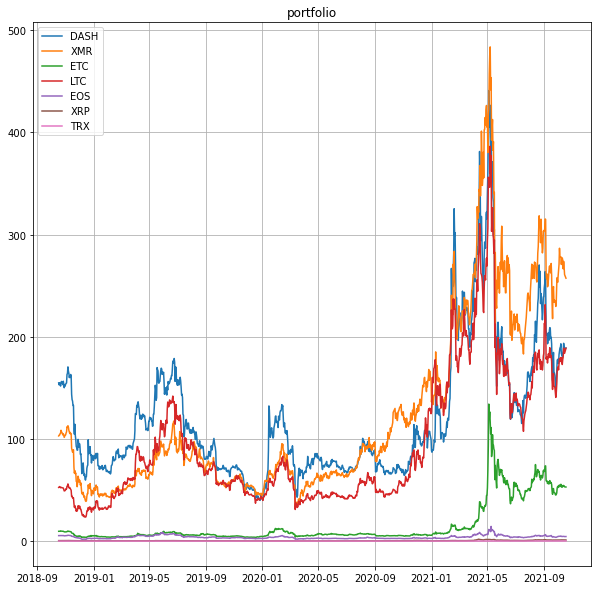

In [7]:
# stock/portfolio

title = 'portfolio'

my_stocks = df
plt.figure(figsize=(10,10))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.grid()
plt.show()

In [8]:
returns = df.pct_change()
returns

,DASH,XMR,ETC,LTC,EOS,XRP,TRX
Date,,,,,,,
2018-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-18,-0.012408,0.007871,0.000414,0.009389,-0.003905,-0.007749,-0.008117
2018-10-19,0.012256,0.000540,0.009410,0.006464,0.007248,0.010949,0.003448
2018-10-20,-0.001357,0.012729,-0.004967,-0.008377,0.009430,-0.005351,0.001614
2018-10-21,-0.018368,0.003425,0.037147,-0.013453,-0.007383,-0.007850,-0.015912
...,...,...,...,...,...,...,...
2021-10-13,0.014698,-0.030941,0.019633,0.014018,0.003320,0.003478,-0.008511
2021-10-14,0.039352,0.027274,-0.002093,0.048278,0.004927,0.007272,0.013843
2021-10-15,-0.016894,-0.020352,-0.004298,-0.013902,-0.014109,-0.004782,0.001888


In [9]:
cov_matrix = returns.cov() * 252
cov_matrix

,DASH,XMR,ETC,LTC,EOS,XRP,TRX
DASH,0.965196,0.580586,0.700971,0.596592,0.679943,0.535138,0.555769
XMR,0.580586,0.679171,0.522693,0.514118,0.542082,0.449934,0.481057
ETC,0.700971,0.522693,0.985160,0.613355,0.723521,0.543107,0.585639
LTC,0.596592,0.514118,0.613355,0.736684,0.679217,0.542121,0.540273
EOS,0.679943,0.542082,0.723521,0.679217,0.979724,0.652916,0.649617
XRP,0.535138,0.449934,0.543107,0.542121,0.652916,0.975336,0.564644
TRX,0.555769,0.481057,0.585639,0.540273,0.649617,0.564644,0.835045


In [10]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

In [11]:
port_variance

0.6257733971727932

In [12]:
# volatility

port_volatility = np.sqrt(port_variance)
port_volatility


0.7910584031364519

In [13]:
return_annual = np.sum(returns.mean() * weights) * 252
return_annual

0.6408774240376892

In [14]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(return_annual, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 64.0%
Annual volatility/risk: 79.0%
Annual variance: 63.0%


In [15]:
from pypfopt.efficient_frontier import efficient_frontier


ModuleNotFoundError: No module named 'pypfopt'